**Modèle de prédiction du diabète:**

Ce jeu de données provient à l'origine de l'Institut national du diabète et des maladies digestives et rénales. L'objectif est de prédire, en fonction de mesures diagnostiques, si un patient est atteint de diabète.

Plusieurs contraintes ont été imposées lors de la sélection de ces cas à partir d'une base de données plus large. En particulier, toutes les patientes sont des femmes âgées d'au moins 21 ans et d'origine indienne de la tribu des Pima.

Grossesses : Nombre de grossesses

Glucose : Concentration de glucose plasmatique 2 heures après un test de tolérance au glucose oral

Pression artérielle : Pression artérielle diastolique (mm Hg)

Épaisseur du pli cutané : Épaisseur du pli cutané du triceps (mm)

Insuline : Insuline sérique à 2 heures (mu U/ml)

IMC : Indice de masse corporelle (poids en kg / (taille en m)^2)

Fonction de pedigree du diabète : Fonction de pedigree du diabète

Âge : Âge (années)

Résultat : Variable de classe (0 ou 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importation du jeu de données
dataset = pd.read_csv('C:/Users/dell/Desktop/diabetes_prediction-system/Dataset/diabetes.csv')

In [3]:
# Affichage des cinq premiers enregistrements des données
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Affichage des cinq derniers enregistrements des données
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# Informations de base sur les colonnes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Nombre de lignes et de colonnes
dataset.shape

(768, 9)

In [ ]:
# Valeurs manquantes
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Description statistique du jeu de données
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Nettoyage des donnees 
dataset.drop_duplicates()
#verifier apres nettoyage 
dataset.shape

(768, 9)

In [ ]:
# Calcul du nombre de cas diabétiques et non diabétiques
num_diabetic = len(dataset.loc[dataset['Outcome'] == 1])
num_non_diabetic = len(dataset.loc[dataset['Outcome'] == 0])

# Affichage des résultats
print("Nombre de cas diabétiques : ", num_diabetic)
print("Nombre de cas non diabétiques : ", num_non_diabetic)


Nombre de cas diabétiques :  268
Nombre de cas non diabétiques :  500


In [ ]:
# Analyse de l'âge
dataset.Age.value_counts()[:10]

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
Name: Age, dtype: int64

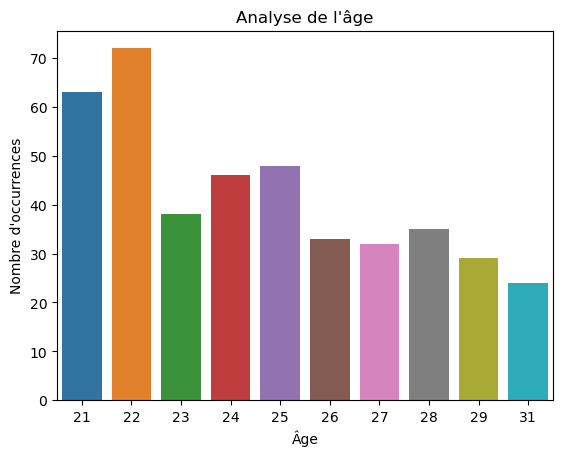

In [ ]:
# Vérification que les données sont équilibrées
sns.barplot(x=dataset.Age.value_counts()[:10].index, y=dataset.Age.value_counts()[:10].values)
plt.xlabel('Âge')
plt.ylabel("Nombre d'occurrences")
plt.title("Analyse de l'âge")
plt.show()


In [ ]:
# Nombre de cas diabétiques et non diabétiques
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# Moyenne des valeurs par classe
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# Nombre de patients sans diabète en pourcentage
countNoDisease = len(dataset[dataset.Outcome == 0])
countHaveDisease = len(dataset[dataset.Outcome == 1])
print("Pourcentage de patients sans diabète : {:.2f}%".format((countNoDisease/(len(dataset.Outcome)))*100))
print("Pourcentage de patients atteints de diabète : {:.2f}%".format((countHaveDisease/(len(dataset.Outcome)))*100))


Pourcentage de patients sans diabète : 65.10%
Pourcentage de patients atteints de diabète : 34.90%


Jeunes âges : 561
Âges moyens : 153
Âges avancés : 54


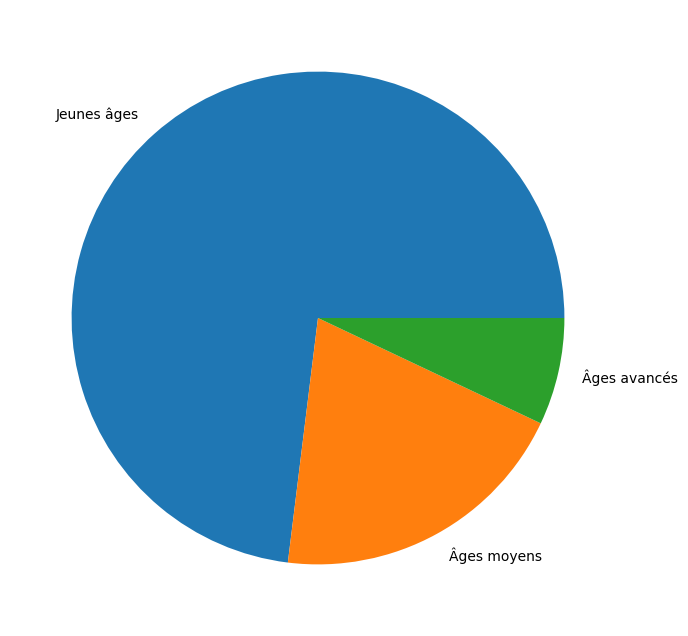

In [ ]:
# Âges des patients
young_ages = dataset[(dataset.Age>=21)&(dataset.Age<40)]
middle_ages =  dataset[(dataset.Age>=40)&(dataset.Age<55)]
elderly_ages =  dataset[(dataset.Age>=55)]

print("Jeunes âges :", len(young_ages))
print("Âges moyens :", len(middle_ages))
print("Âges avancés :", len(elderly_ages))

colors = ['blue', 'green', 'red']
explode= [1, 1, 1]
plt.figure(figsize=(8, 8))
plt.pie([len(young_ages), len(middle_ages), len(elderly_ages)], labels=['Jeunes âges', 'Âges moyens', 'Âges avancés'])
plt.show()

Originaux True(1)  : 268 (34.90%)
Originaux False(0) : 500 (65.10%)



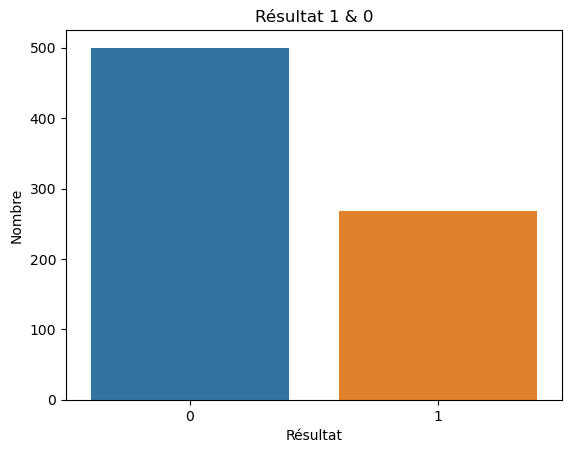

In [ ]:
# Nombre de cas diabétiques et non diabétiques (graphique à barres)
print("Originaux True(1)  : {0} ({1:0.2f}%)".format(len(dataset.loc[dataset['Outcome'] == 1]), (len(dataset.loc[dataset['Outcome'] == 1])/len(dataset.index)) * 100.0))
print("Originaux False(0) : {0} ({1:0.2f}%)".format(len(dataset.loc[dataset['Outcome'] == 0]), (len(dataset.loc[dataset['Outcome'] == 0])/len(dataset.index)) * 100.0))
print("")
sns.countplot(dataset.Outcome)
plt.xlabel('Résultat')
plt.ylabel('Nombre')
plt.title('Résultat 1 & 0')
plt.show()

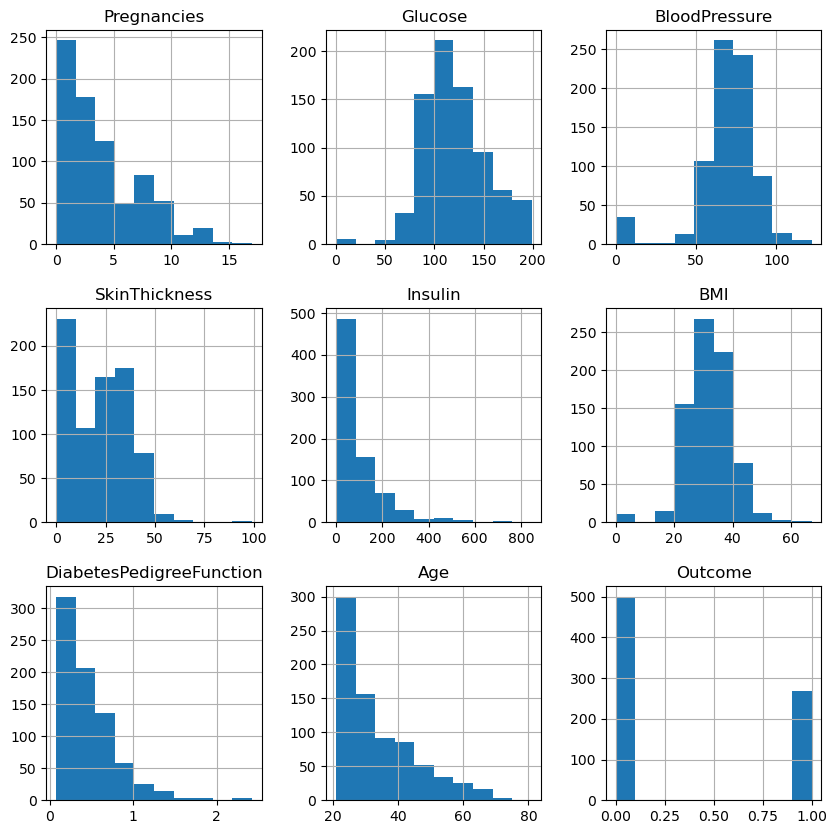

In [ ]:
# Histogrammes des colonnes
dataset.hist(bins=10, figsize=(10, 10))
plt.show()

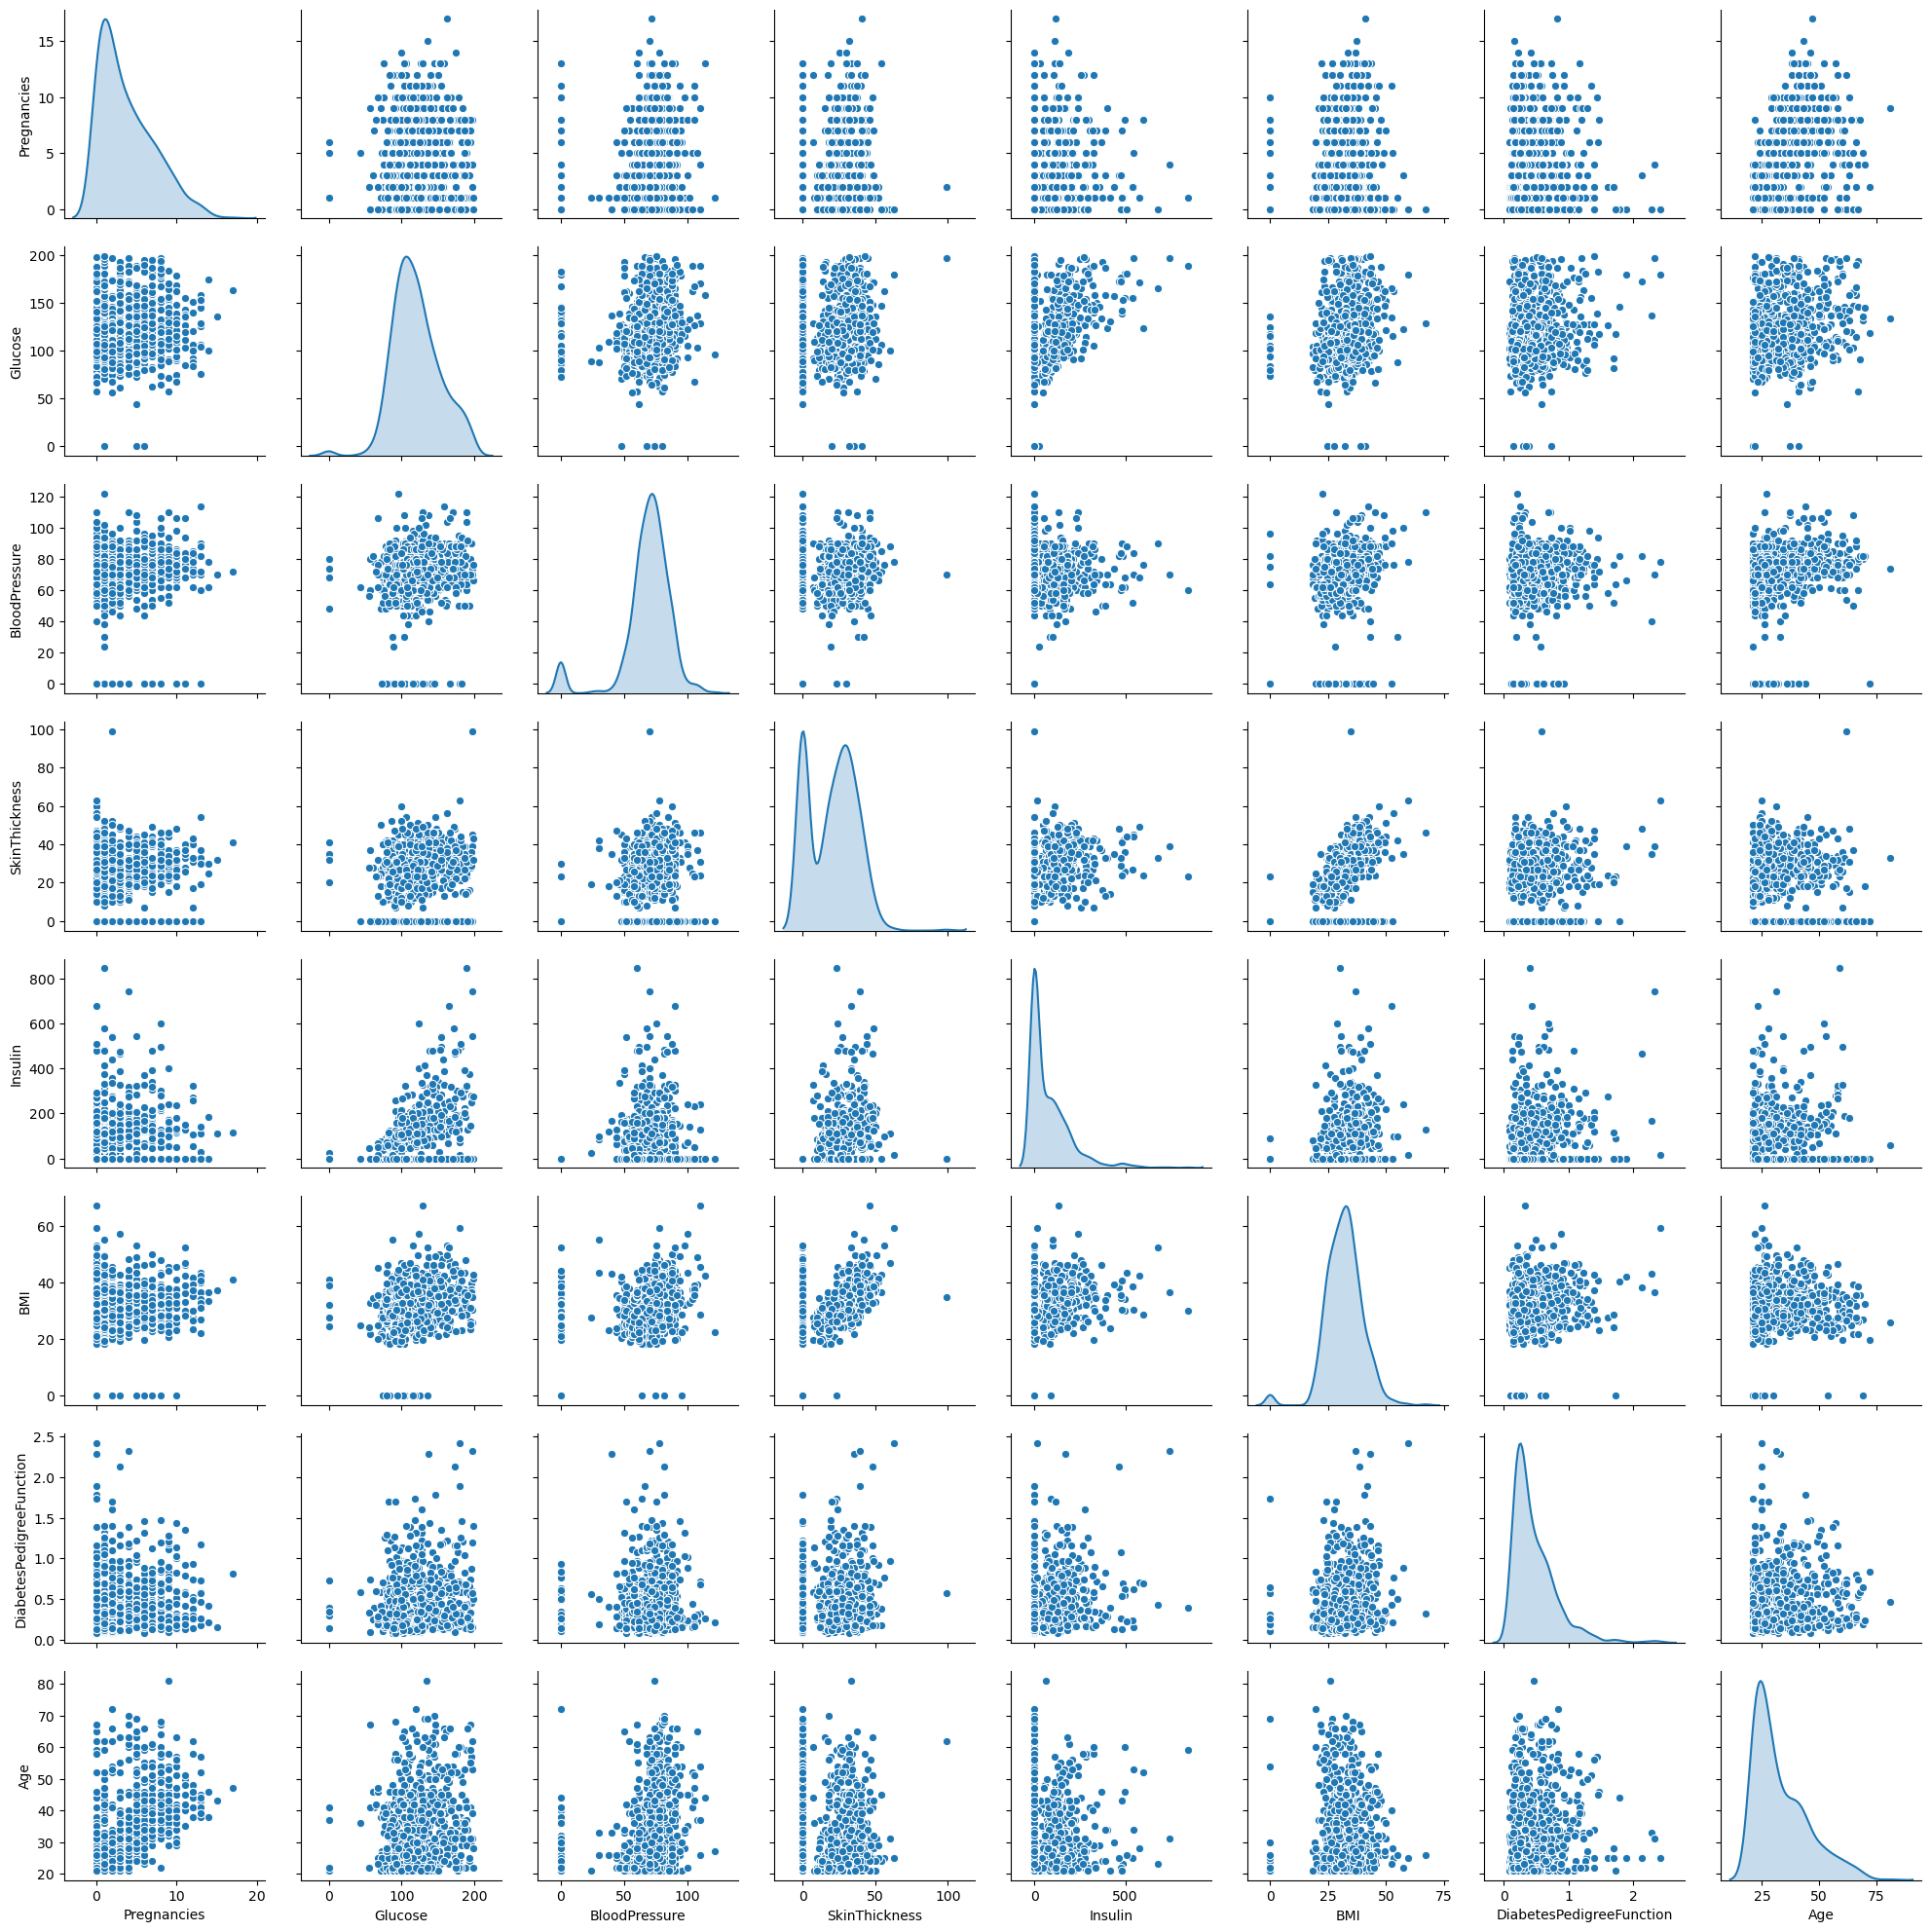

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des colonnes à inclure dans la matrice de graphiques de dispersion
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Création de la matrice de graphiques de dispersion
sns.pairplot(dataset[columns], diag_kind='kde')
plt.show()



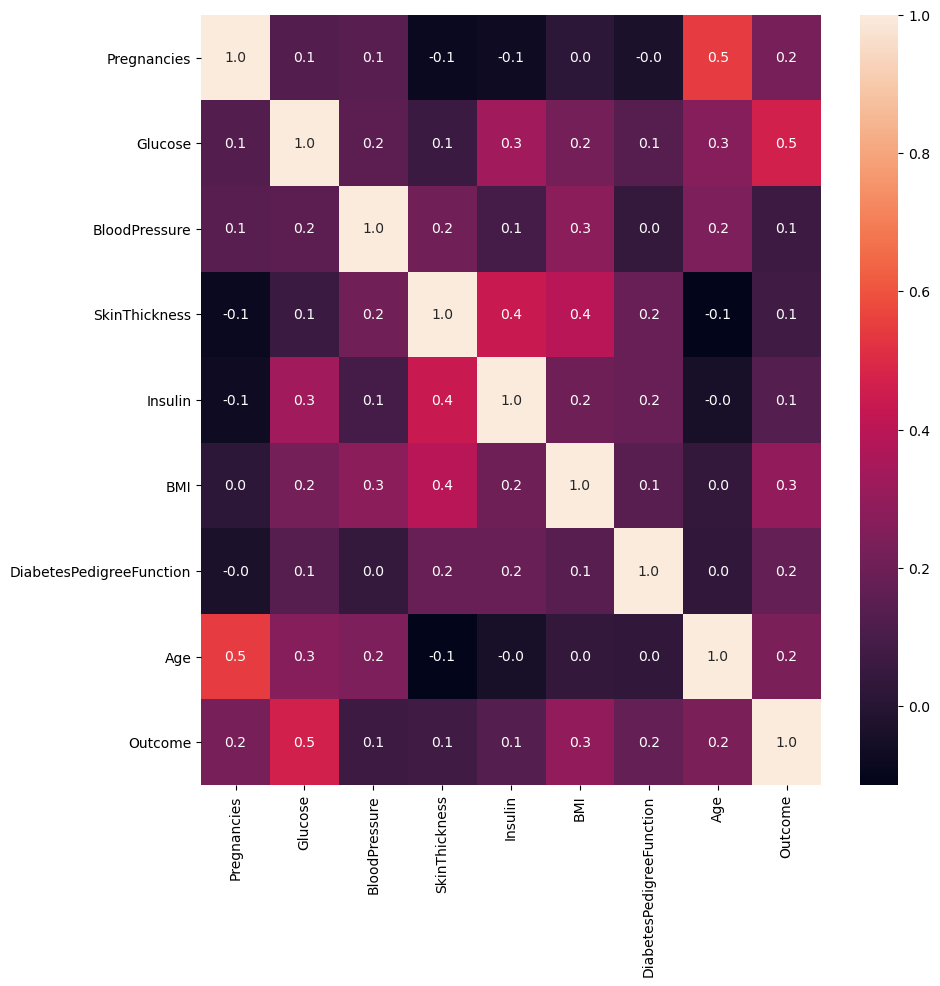

In [ ]:
# Matrice de corrélation
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=True, fmt='.1f')
plt.show()

## Division des données

In [ ]:
# Séparation des données en entrées (X) et sortie (Y)
X = dataset.drop(['Outcome'], axis=1)
Y = dataset.Outcome.values


In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
# les 5 premiers enregistrement de X 
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
#Normalisation des donnees 
from sklearn.preprocessing import StandardScaler

# # Initialiser le scaler
scaler = StandardScaler()

# Normaliser les données
SSX = scaler.fit_transform(X)
print(SSX)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
# Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, Y_train, Y_test = train_test_split(SSX, Y, test_size=0.2, random_state=1)


In [ ]:
(X_train.shape, Y_train.shape)

((614, 8), (614,))

In [ ]:
(X_test.shape, Y_test.shape)

((154, 8), (154,))

In [ ]:
# Affichage de la taille du jeu d'entraînement et du jeu de test
print("Taille du jeu d'entraînement : ", X_train.size)
print("Taille du jeu de test : ", X_test.size)

Taille du jeu d'entraînement :  4912
Taille du jeu de test :  1232


In [ ]:
# Vérification que les valeurs prédites ont été divisées correctement
print("Originaux True  : {0} ({1:0.2f}%)".format(len(dataset.loc[dataset['Outcome'] == 1]), (len(dataset.loc[dataset['Outcome'] == 1])/len(dataset.index)) * 100.0))
print("Originaux False : {0} ({1:0.2f}%)".format(len(dataset.loc[dataset['Outcome'] == 0]), (len(dataset.loc[dataset['Outcome'] == 0])/len(dataset.index)) * 100.0))
print("")
print("Entraînement True  : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train) * 100.0)))
print("Entraînement False : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test) * 100.0)))

Originaux True  : 268 (34.90%)
Originaux False : 500 (65.10%)

Entraînement True  : 213 (34.69%)
Entraînement False : 401 (65.31%)

Test True      : 55 (35.71%)
Test False     : 99 (64.29%)


# Construction du modèle

 **Modele Knearst neighbors**

In [ ]:
# Modèle KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

#entrainement du modele 
knn.fit(X_train, Y_train)

# Évaluation : 
#Prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)
# Calcul de l'exactitude (accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
print("Exactitude de KNN: {:.2f}%".format(accuracy * 100))

# Calcul de la précision (precision)
from sklearn.metrics import precision_score
precision = precision_score(Y_test, y_pred)
print("Précision de KNN: {:.2f}%".format(precision * 100))

# Calcul du rappel (recall)
from sklearn.metrics import recall_score
recall = recall_score(Y_test, y_pred)
print("Rappel de KNN: {:.2f}%".format(recall * 100))

# Calcul du score F1
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, y_pred)
print("Score F1 de KNN: {:.2f}%".format(f1 * 100))

Exactitude de KNN: 72.08%
Précision de KNN: 63.04%
Rappel de KNN: 52.73%
Score F1 de KNN: 57.43%


In [ ]:
from sklearn.metrics import confusion_matrix

# Faire des prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(Y_test, y_pred)

# Extraire les valeurs de TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Afficher la matrice de confusion avec TP, TN, FP, FN
print("Matrice de confusion :")
print(cm)
print("Vrais positifs (TP) :", TP)
print("Vrais négatifs (TN) :", TN)
print("Faux positifs (FP) :", FP)
print("Faux négatifs (FN) :", FN)

Matrice de confusion :
[[82 17]
 [26 29]]
Vrais positifs (TP) : 29
Vrais négatifs (TN) : 82
Faux positifs (FP) : 17
Faux négatifs (FN) : 26


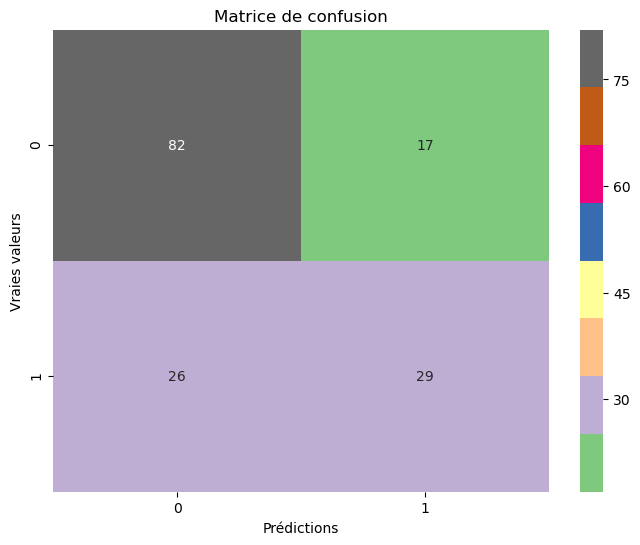

In [ ]:
#matrice de confusion
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Faire des prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(Y_test, y_pred)

# Créer un graphe coloré à partir de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Accent', fmt='g')

# Ajouter les labels des axes et le titre du graphe
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')

# Afficher le graphe
plt.show()


In [ ]:
#le rapport de classification de knn
from sklearn.metrics import classification_report

# Faire des prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)

# Générer le rapport de classification
report = classification_report(Y_test, y_pred)

# Afficher le rapport
print(report)

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        99
           1       0.63      0.53      0.57        55

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.72      0.71       154



**Modele de random forest**

In [ ]:
#Modele random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, max_depth=100, random_state=1)

#entrainement du modele random forest
rf.fit(X_train, Y_train)

# Évaluation : 

#Prédictions sur l'ensemble de test
y_pred = rf.predict(X_test)
# Calcul de l'exactitude (accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
print("Exactitude de RF : {:.2f}%".format(accuracy * 100))

# Calcul de la précision (precision)
from sklearn.metrics import precision_score
precision = precision_score(Y_test, y_pred)
print("Précision de RF: {:.2f}%".format(precision * 100))

# Calcul du rappel (recall)
from sklearn.metrics import recall_score
recall = recall_score(Y_test, y_pred)
print("Rappel de RF: {:.2f}%".format(recall * 100))

# Calcul du score F1
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, y_pred)
print("Score F1 de RF: {:.2f}%".format(f1 * 100))

Exactitude de RF : 80.52%
Précision de RF: 75.51%
Rappel de RF: 67.27%
Score F1 de RF: 71.15%


In [ ]:
from sklearn.metrics import confusion_matrix

# Faire des prédictions sur l'ensemble de test
y_pred = rf.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(Y_test, y_pred)

# Extraire les valeurs de TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Afficher la matrice de confusion avec TP, TN, FP, FN
print("Matrice de confusion :")
print(cm)
print("Vrais positifs (TP) :", TP)
print("Vrais négatifs (TN) :", TN)
print("Faux positifs (FP) :", FP)
print("Faux négatifs (FN) :", FN)


Matrice de confusion :
[[87 12]
 [18 37]]
Vrais positifs (TP) : 37
Vrais négatifs (TN) : 87
Faux positifs (FP) : 12
Faux négatifs (FN) : 18


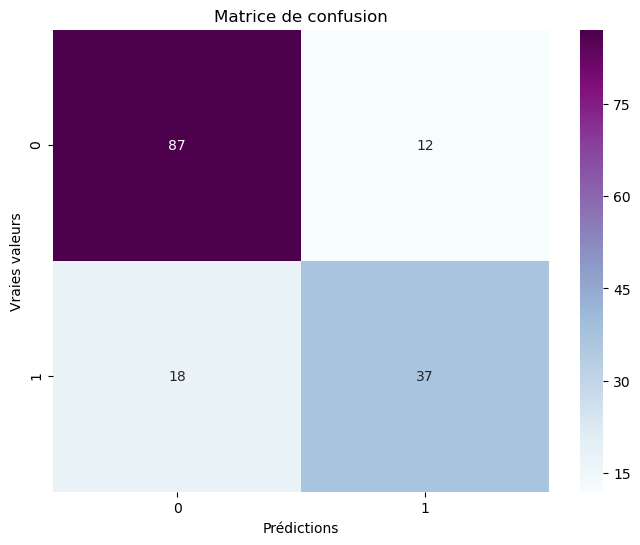

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Faire des prédictions sur l'ensemble de test
y_pred = rf.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(Y_test, y_pred)

# Créer un graphe coloré à partir de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')

# Ajouter les labels des axes et le titre du graphe
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')

# Afficher le graphe
plt.show()


In [ ]:
#le rapport de classification de random forest
from sklearn.metrics import classification_report

# Faire des prédictions sur l'ensemble de test
y_pred = rf.predict(X_test)

# Générer le rapport de classification
report = classification_report(Y_test, y_pred)

# Afficher le rapport
print(report)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        99
           1       0.76      0.67      0.71        55

    accuracy                           0.81       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.80      0.81      0.80       154



**Modele de decision tree**

In [ ]:
# Decision tree(Arbre de décision)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
#entrainement du modele 
dt.fit(X_train, Y_train)

#Évaluation : 

#Prédictions sur l'ensemble de test
y_pred = dt.predict(X_test)

# Calcul de l'exactitude (accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
print("Exactitude de DT : {:.2f}%".format(accuracy * 100))

# Calcul de la précision (precision)
from sklearn.metrics import precision_score
precision = precision_score(Y_test, y_pred)
print("Précision de DT : {:.2f}%".format(precision * 100))

# Calcul du rappel (recall)
from sklearn.metrics import recall_score
recall = recall_score(Y_test, y_pred)
print("Rappel de DT: {:.2f}%".format(recall * 100))

# Calcul du score F1
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, y_pred)
print("Score F1 de DT: {:.2f}%".format(f1 * 100))


Exactitude de DT : 75.32%
Précision de DT : 70.73%
Rappel de DT: 52.73%
Score F1 de DT: 60.42%


In [ ]:
from sklearn.metrics import confusion_matrix

# Faire des prédictions sur l'ensemble de test
y_pred = dt.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(Y_test, y_pred)

# Extraire les valeurs de TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Afficher la matrice de confusion avec TP, TN, FP, FN
print("Matrice de confusion :")
print(cm)
print("Vrais positifs (TP) :", TP)
print("Vrais négatifs (TN) :", TN)
print("Faux positifs (FP) :", FP)
print("Faux négatifs (FN) :", FN)


Matrice de confusion :
[[87 12]
 [26 29]]
Vrais positifs (TP) : 29
Vrais négatifs (TN) : 87
Faux positifs (FP) : 12
Faux négatifs (FN) : 26


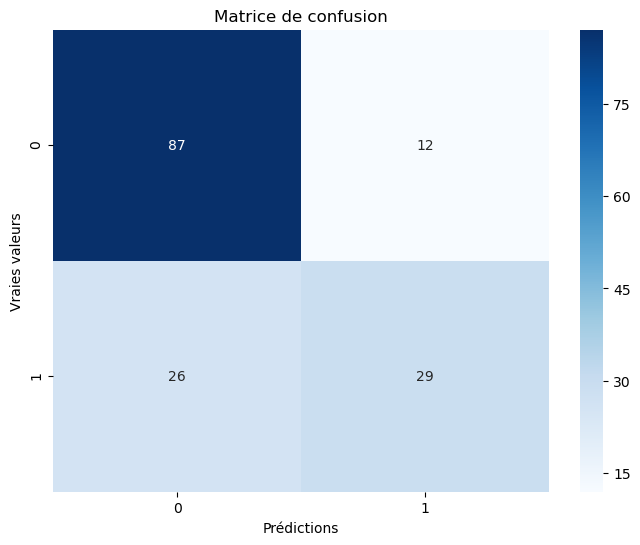

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Faire des prédictions sur l'ensemble de test
y_pred = dt.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(Y_test, y_pred)

# Créer un graphe coloré à partir de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Ajouter les labels des axes et le titre du graphe
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')

# Afficher le graphe
plt.show()

In [ ]:
#le rapport de classification de decision tree
from sklearn.metrics import classification_report

# Faire des prédictions sur l'ensemble de test
y_pred = dt.predict(X_test)

# Générer le rapport de classification
report = classification_report(Y_test, y_pred)

# Afficher le rapport
print(report)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        99
           1       0.71      0.53      0.60        55

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



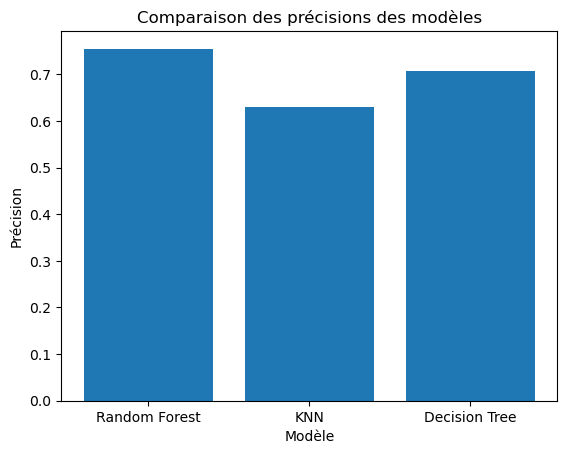

In [ ]:
import matplotlib.pyplot as plt

# Calcul des précisions pour chaque modèle
precision_rf = precision_score(Y_test, rf.predict(X_test))
precision_knn = precision_score(Y_test, knn.predict(X_test))
precision_dt = precision_score(Y_test, dt.predict(X_test))

# Création de la liste des modèles et des précisions correspondantes
models = ['Random Forest', 'KNN', 'Decision Tree']
precisions = [precision_rf, precision_knn, precision_dt]

# Tracé du graphique comparatif
plt.bar(models, precisions)
plt.xlabel('Modèle')
plt.ylabel('Précision')
plt.title('Comparaison des précisions des modèles')
plt.show()


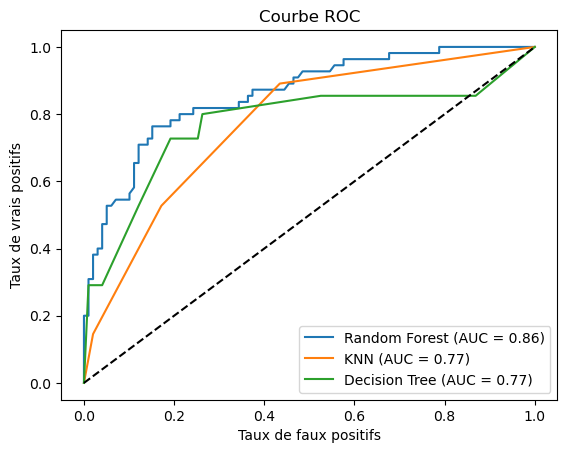

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcul des scores de probabilité pour chaque modèle
probas_rf = rf.predict_proba(X_test)[:, 1]
probas_knn = knn.predict_proba(X_test)[:, 1]
probas_dt = dt.predict_proba(X_test)[:, 1]

# Calcul des courbes ROC et des aires sous la courbe (AUC) pour chaque modèle
fpr_rf, tpr_rf, _ = roc_curve(Y_test, probas_rf)
fpr_knn, tpr_knn, _ = roc_curve(Y_test, probas_knn)
fpr_dt, tpr_dt, _ = roc_curve(Y_test, probas_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_knn = auc(fpr_knn, tpr_knn)
auc_dt = auc(fpr_dt, tpr_dt)

# Tracé de la courbe ROC
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(auc_knn))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(auc_dt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()
